## Data Ingestion

In [1]:
## Document datastructure

from langchain_core.documents import Document

In [2]:
doc = Document(
    page_content="Main file content",
    metadata=(
        {
            "Source": "example.text",
            "pages": 1,
            "author": "Aquib"
        }
    )
)

In [3]:
doc

Document(metadata={'Source': 'example.text', 'pages': 1, 'author': 'Aquib'}, page_content='Main file content')

In [4]:
## Text Loader

from langchain_community.document_loaders import TextLoader

loader = TextLoader(r"..\data\text_files\python.txt",encoding='utf-8')
document = loader.load()
print(document)

c:\Users\maquib\projects\rag\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Document(metadata={'source': '..\\data\\text_files\\python.txt'}, page_content='Python Programming Language\n\nPython is a high-level, interpreted programming language renowned for its elegant syntax and exceptional readability. Created by Guido van Rossum and first released in 1991, Python has evolved into one of the world\'s most popular and versatile programming languages.\n\nCore Features\n1. Simple and Readable Syntax: Uses indentation for code blocks and emphasizes code readability\n2. Dynamic Typing: Variables are dynamically typed, making development more flexible\n3. Rich Standard Library: Comes with "batteries included" for diverse programming tasks\n4. Cross-Platform: Runs on Windows, macOS, Linux, and other platforms\n5. Active Community: Large, supportive community creating numerous third-party packages\n\nKey Applications\n- Web Development: Frameworks like Django and Flask\n- Data Science: NumPy, Pandas, and SciPy libraries\n- Machine Learning: TensorFlow, PyTorch, and 

In [5]:
## Directory Loader
from langchain_community.document_loaders import DirectoryLoader

dir_loader = DirectoryLoader(
    r"..\data\text_files",
    glob = "**/*.txt",
    loader_cls= TextLoader, # if there is pdf also then use list of loaders
    loader_kwargs={'encoding':'utf-8'},
    show_progress=True
)

dir_document = dir_loader.load()
print(dir_document)

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 60.94it/s]

[Document(metadata={'source': '..\\data\\text_files\\ml.txt'}, page_content='Machine Learning - overview and notes\n\nWhat is ML:\nMachine learning (ML) builds models that learn patterns from data to make predictions or decisions without being explicitly programmed.\n\nMain types:\n- Supervised learning: regression, classification (labels provided).\n- Unsupervised learning: clustering, dimensionality reduction (no labels).\n- Reinforcement learning: agents learn via rewards and interactions.\n\nTypical workflow:\n1. Problem definition and metrics.\n2. Data collection and exploration (EDA).\n3. Preprocessing: cleaning, imputation, scaling, categorical encoding.\n4. Feature engineering and selection.\n5. Train/validation/test split; cross-validation.\n6. Model training and hyperparameter tuning.\n7. Evaluation on hold-out test set.\n8. Deployment and monitoring.\n\nCommon algorithms:\n- Linear models: linear regression, logistic regression.\n- Tree-based: decision trees, random forest, 

In [6]:
# for pdf
from langchain_community.document_loaders import PyPDFLoader,PyMuPDFLoader

pdf_loader = DirectoryLoader(
    r"..\data\pdf_files",
    glob = "**/*.pdf",
    loader_cls= PyMuPDFLoader,
    show_progress=True
)

pdf_document = pdf_loader.load()
pdf_document

100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


[Document(metadata={'producer': 'PDFium', 'creator': 'PDFium', 'creationdate': 'D:20251023172502', 'source': '..\\data\\pdf_files\\attention.pdf', 'file_path': '..\\data\\pdf_files\\attention.pdf', 'total_pages': 11, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': 'D:20251023172502', 'page': 0}, page_content='Attention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. T

| Feature          | **PyPDFLoader**    | **PyMuPDFLoader**              |
| ---------------- | ------------------ | ------------------------------ |
| Library          | PyPDF2             | PyMuPDF (fitz)                 |
| Speed            | ⚡ Fast             | 🐢 Slightly slower             |
| Text Extraction  | Basic (plain text) | Advanced (preserves structure) |
| Layout / Columns | ❌ Ignored          | ✅ Preserved                    |
| Scanned PDFs     | ❌ No               | ⚠️ Partial (with OCR)          |
| Best For         | Simple text PDFs   | Complex or formatted PDFs      |


DirectoryLoader uses one loader_cls for all files, so it can’t automatically choose the correct loader per extension

LangChain’s DirectoryLoader allows a custom callable for loader_cls — meaning you can define a function that returns the correct loader based on file extension.

In [8]:
from langchain_community.document_loaders import DirectoryLoader, PyMuPDFLoader, TextLoader, CSVLoader

def dynamic_loader(file_path):
    """Return the right loader depending on file extension."""
    if file_path.lower().endswith(".pdf"):
        return PyMuPDFLoader(file_path)
    elif file_path.lower().endswith(".txt"):
        return TextLoader(file_path, encoding="utf-8")
    elif file_path.lower().endswith(".csv"):
        return CSVLoader(file_path)
    else:
        raise ValueError(f"Unsupported file type: {file_path}")

folder_path = r"..\data"

# DirectoryLoader can now handle mixed formats
mixed_loader = DirectoryLoader(
    folder_path,
    glob="**/*.*",
    loader_cls=dynamic_loader,   # <— dynamic decision
    show_progress=True
)

all_docs = mixed_loader.load()

print(f"✅ Loaded {len(all_docs)} documents from mixed formats.")


100%|██████████| 4/4 [00:00<00:00, 37.49it/s]

✅ Loaded 23 documents from mixed formats.


## RAG Pipeline - Data Ingestion to vectorDB PipeLine

In [1]:
import os
from langchain_community.document_loaders import TextLoader,DirectoryLoader,PyMuPDFLoader,PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from pathlib import Path


c:\Users\maquib\projects\rag\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## Read all the file inside the dir
def process_all_pdfs(pdf_directory):
    all_documents = []
    pdf_dir = Path(pdf_directory)

    pdf_files = list(pdf_dir.glob("**/*.pdf"))

    print(f"Found {len(pdf_files)} PDF files to process")

    for pdf_file in pdf_files:
        print(f"\nProcessing: {pdf_file.name}")
        try:
            loader = PyPDFLoader(pdf_file)
            documents = loader.load()

            for doc in documents:
                doc.metadata['source_file'] = pdf_file.name
                doc.metadata['file_type'] = "pdf"
            
            all_documents.extend(documents)
            print(f" Loaded {len(documents)} pages")
        except Exception as e:
            print(f"Error: {e}")
    print(f"\nTotal Documents loaded: {len(all_documents)}")
    return all_documents

all_pdf_documents = process_all_pdfs("../data")

Found 2 PDF files to process

Processing: attention.pdf
 Loaded 11 pages

Processing: yolo.pdf
 Loaded 10 pages

Total Documents loaded: 21


In [4]:
## For Production purpose
from langchain_community.document_loaders import DirectoryLoader, PyMuPDFLoader, TextLoader, CSVLoader
from pathlib import Path

def process_all_documents(data_directory: str):
    """
    Use DirectoryLoader to load all PDFs, TXTs, and CSVs from one directory.
    Automatically applies the correct loader per file type.
    """
    
    # Define a dynamic loader selector
    def dynamic_loader(file_path: str):
        if file_path.lower().endswith(".pdf"):
            return PyMuPDFLoader(file_path)
        elif file_path.lower().endswith(".txt"):
            return TextLoader(file_path, encoding="utf-8")
        elif file_path.lower().endswith(".csv"):
            return CSVLoader(file_path)
        else:
            raise ValueError(f"❌ Unsupported file type: {file_path}")

    # Create a single DirectoryLoader that handles all formats
    loader = DirectoryLoader(
        data_directory,
        glob="**/*.*",          # Include all file types
        loader_cls=dynamic_loader,
        show_progress=True
    )

    print("📂 Scanning directory for supported files...")
    all_documents = loader.load()
    print(f"✅ Total documents loaded: {len(all_documents)}")

    # Add metadata (file name + type)
    for doc in all_documents:
        path = Path(doc.metadata["source"])
        doc.metadata["source_file"] = path.name
        doc.metadata["file_type"] = path.suffix.lower().replace(".", "")

    return all_documents


# --- Run it ---
all_docs = process_all_documents("../data")
print(f"📊 Final count: {len(all_docs)} documents loaded.")


📂 Scanning directory for supported files...


100%|██████████| 4/4 [00:00<00:00, 27.61it/s]

✅ Total documents loaded: 23
📊 Final count: 23 documents loaded.


In [5]:
### Text Splitting

def split_documents(documents,chunk_size=1000,chunk_overlap=200):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size = chunk_size,
        chunk_overlap = chunk_overlap,
        length_function = len,
        separators= ["\n\n","\n"," ",""]
    )
    split_docs = text_splitter.split_documents(documents)
    print(f"Split {len(documents)} documents into {len(split_docs)} chunks")

    if split_docs:
        print("\nExample chunk:")
        print(f"Content: {split_docs[0].page_content[:200]}...")
        print(f"Metadata: {split_docs[0].metadata}")
    return split_docs

In [6]:
chunks = split_documents(all_pdf_documents)

Split 21 documents into 98 chunks

Example chunk:
Content: Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz...
Metadata: {'producer': 'PDFium', 'creator': 'PDFium', 'creationdate': 'D:20251023172502', 'source': '..\\data\\pdf_files\\attention.pdf', 'total_pages': 11, 'page': 0, 'page_label': '1', 'source_file': 'attention.pdf', 'file_type': 'pdf'}


| Use Case                                  | Recommended `chunk_size` | Recommended `chunk_overlap` | Notes                             |
| ----------------------------------------- | ------------------------ | --------------------------- | --------------------------------- |
| 🧾 Short text files (e.g., emails, notes) | 500–1000                 | 50–100                      | Preserve small context            |
| 📚 Long PDFs or articles                  | 1000–2000                | 150–300                     | Balance context + performance     |
| 🧠 LLM retrieval (RAG)                    | 500–1500                 | 100–200                     | Avoid context cutoff mid-sentence |
| ⚙️ Code or structured data                | 200–500                  | 50–100                      | Finer-grained chunks help search  |
| 🪶 Summarization (few-shot context)       | 2000–4000                | 200–400                     | Larger chunks preserve flow       |


⚖️ General Rules of Thumb

Overlap ≈ 10–20% of chunk size → keeps coherence without too much duplication.

Smaller chunks → better for search and retrieval.

Larger chunks → better for summarization or context-rich tasks.

Tune based on embedding model’s context window (e.g., 1024–8192 tokens).


### Embedding and VectorStore DB

In [7]:
import numpy as np
from sentence_transformers import SentenceTransformer
import chromadb
from chromadb.config import Settings
import uuid
from typing import List,Dict,Any,Tuple
from sklearn.metrics.pairwise import cosine_similarity


In [18]:
# class EmbeddingManager:
#     def __init__(self,model_name:str = "all-MiniLM-L6-v2"):
#         self.model_name = model_name
#         self.model = None
#         self._load_model()
    
#     def _load_model(self):
#         try:
#             print(f"Loading Embedding Model: {self.model_name}")
#             self.model = SentenceTransformer(self.model_name)
#             print(f"Model Loaded Successfully. Embedding Dimension: {self.model.get_sentence_embedding_dimension()}")
#         except Exception as e:
#             raise RuntimeError(f"Failed to load model '{self.model_name}': {e}")

    
#     def generate_embeddings(self,texts:List[str]) -> np.ndarray:
#         if not self.model:
#             raise ValueError("Model not loaded")
#         print(f"Generating embeddings for {len(texts)} texts...")
#         if isinstance(texts, str):
#             texts = [texts]
#         embeddings = self.model.encode(texts,show_progress_bar=True)
#         print(f"Generated embeddings with shape: {embeddings.shape}")
#         return embeddings
    

# For Azure Openai Embeddings

import os
import numpy as np
from typing import List
from openai import AzureOpenAI

class EmbeddingManager:
    def __init__(self, model_name: str = None):
        # Read environment variables
        azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
        api_key = os.getenv("AZURE_OPENAI_API_KEY")
        api_version = os.getenv("AZURE_OPENAI_API_VERSION")
        
        if not azure_endpoint or not api_key or not api_version:
            raise ValueError("AZURE_OPENAI_ENDPOINT, AZURE_OPENAI_API_KEY, and AZURE_OPENAI_API_VERSION must all be set in environment variables.")
        
        # Default to your deployed model name if not passed
        self.model_name = model_name or os.getenv("AZURE_OPENAI_EMBEDDING_MODEL", "text-embedding-3-large")

        # Initialize Azure OpenAI client
        self.client = AzureOpenAI(
            api_key=api_key,
            api_version=api_version,
            azure_endpoint=azure_endpoint
        )

    def generate_embeddings(self, texts: List[str]) -> np.ndarray:
        if not isinstance(texts, list) or not all(isinstance(t, str) for t in texts):
            raise TypeError("Input must be a list of strings.")

        print(f"Generating embeddings for {len(texts)} texts using model: {self.model_name}")

        response = self.client.embeddings.create(
            model=self.model_name,
            input=texts
        )

        embeddings = np.array([item.embedding for item in response.data], dtype=np.float32)
        print(f"Generated embeddings with shape: {embeddings.shape}")
        return embeddings


In [ ]:
embedding_manager = EmbeddingManager(model_name="text-embedding-3-large")

In [20]:
## VectorStore

class VectorStore:
    def __init__(self,collection_name:str="pdf_documents",persist_directory:str="../data/vector_store"):

        self.collection_name =  collection_name
        self.persist_directory = persist_directory
        self.client = None
        self.collection = None
        self._initialize_store()
    
    def _initialize_store(self):
        try:
            os.makedirs(self.persist_directory,exist_ok=True)
            self.client =  chromadb.PersistentClient(path=self.persist_directory)

            self.collection = self.client.get_or_create_collection(
                name=self.collection_name,
                metadata= {"description": "PDF document embeddings for RAG"}
            )
            print(f"vector store initialized. Collection: {self.collection_name}")
            print(f"Existing documents in collection: {self.collection.count()}")
        except Exception as e:
            print(f"Error initializing vector store: {e}")
            raise
    
    def add_documents(self,documents:List[Any],embeddings:np.ndarray):
        if len(documents)!=len(embeddings):
            raise ValueError("Number of documents must match number of embeddings")
        print(f"Adding {len(documents)} documents to vector store...")

        #prepare data for chromadb
        ids = []
        metadatas = []
        documents_text = []
        embeddings_list = []

        for i ,(doc,embedding) in enumerate(zip(documents,embeddings)):
            doc_id = f"doc_{uuid.uuid4().hex[:8]}_{i}"
            ids.append(doc_id)

            metadata = metadata = dict(doc.metadata) if getattr(doc, "metadata", None) else {}
            metadata['doc_index'] = i
            metadata['content_length'] = len(doc.page_content)
            metadatas.append(metadata)

            documents_text.append(doc.page_content)
            embeddings_list.append(embedding.tolist())

        try:
            self.collection.add(
                ids = ids,
                embeddings = embeddings_list,
                metadatas = metadatas,
                documents= documents_text
            )
            print(f"Successfully added {len(documents)} documents to vector store")
            print(f"Total documents in the collections: {self.collection.count()}")
        except Exception as e:
            print(f"Error adding documents to vector store: {e}")
            raise


In [21]:
vectorstore = VectorStore()

vector store initialized. Collection: pdf_documents
Existing documents in collection: 0


In [22]:
texts = [doc.page_content for doc in chunks]
embeddings = embedding_manager.generate_embeddings(texts)

vectorstore.add_documents(chunks,embeddings)

Generating embeddings for 98 texts using model: text-embedding-3-large
Generated embeddings with shape: (98, 3072)
Adding 98 documents to vector store...
Successfully added 98 documents to vector store
Total documents in the collections: 98


## Retriever Pipeline From VectorStore

In [23]:
class RAGRetriever:
    def __init__(self,vector_store:VectorStore, embedding_manager: EmbeddingManager):
        self.vector_store = vector_store
        self.embedding_manager = embedding_manager
    
    def retrieve(self, query: str, top_k: int = 5, score_threshold: float = 0.0) -> List[Dict[str, Any]]:
        """
        Retrieve relevant documents for a query
        
        Args:
            query: The search query
            top_k: Number of top results to return
            score_threshold: Minimum similarity score threshold
            
        Returns:
            List of dictionaries containing retrieved documents and metadata
        """
        print(f"Retrieving documents for query: '{query}'")
        print(f"Top K: {top_k}, Score threshold: {score_threshold}")
        
        # Generate query embedding
        query_embedding = self.embedding_manager.generate_embeddings([query])[0]
        
        # Search in vector store
        try:
            results = self.vector_store.collection.query(
                query_embeddings=[query_embedding.tolist()],
                n_results=top_k
            )
            
            # Process results
            retrieved_docs = []
            
            if results['documents'] and results['documents'][0]:
                documents = results['documents'][0]
                metadatas = results['metadatas'][0]
                distances = results['distances'][0]
                ids = results['ids'][0]
                
                for i, (doc_id, document, metadata, distance) in enumerate(zip(ids, documents, metadatas, distances)):
                    # Convert distance to similarity score (ChromaDB uses cosine distance)
                    similarity_score = 1 - distance
                    
                    if similarity_score >= score_threshold:
                        retrieved_docs.append({
                            'id': doc_id,
                            'content': document,
                            'metadata': metadata,
                            'similarity_score': similarity_score,
                            'distance': distance,
                            'rank': i + 1
                        })
                
                print(f"Retrieved {len(retrieved_docs)} documents (after filtering)")
            else:
                print("No documents found")
            
            return retrieved_docs
            
        except Exception as e:
            print(f"Error during retrieval: {e}")
            return []


In [24]:
rag_retriever=RAGRetriever(vectorstore,embedding_manager)

In [27]:
rag_retriever.retrieve("What is yolo model")

Retrieving documents for query: 'What is yolo model'
Top K: 5, Score threshold: 0.0
Generating embeddings for 1 texts using model: text-embedding-3-large
Generated embeddings with shape: (1, 3072)
Retrieved 2 documents (after filtering)


[{'id': 'doc_29f0ace4_44',
  'content': 'YOLO model processes images in real-time at 45 frames\nper second. A smaller version of the network, Fast YOLO,\nprocesses an astounding 155 frames per second while\nstill achieving double the mAP of other real-time detec-\ntors. Compared to state-of-the-art detection systems, YOLO\nmakes more localization errors but is less likely to predict\nfalse positives on background. Finally, YOLO learns very\ngeneral representations of objects. It outperforms other de-\ntection methods, including DPM and R-CNN, when gener-\nalizing from natural images to other domains like artwork.\n1. Introduction\nHumans glance at an image and instantly know what ob-\njects are in the image, where they are, and how they inter-\nact. The human visual system is fast and accurate, allow-\ning us to perform complex tasks like driving with little con-\nscious thought. Fast, accurate algorithms for object detec-\ntion would allow computers to drive cars without special-\nize

In [23]:
"""import os
from openai import AzureOpenAI
from dotenv import load_dotenv

load_dotenv(override=True)

endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
model_name = "gpt-4o"
deployment = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")

subscription_key = os.getenv("AZURE_OPENAI_API_KEY")
api_version = os.getenv("AZURE_OPENAI_API_VERSION")

client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=endpoint,
    api_key=subscription_key,
)

response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant.",
        },
        {
            "role": "user",
            "content": "hello how are you?",
        }
    ],
    stream=True,
    max_tokens=4096,
    temperature=1.0,
    top_p=1.0,
    model=deployment
)

# print(response.choices[0].message.content)

for update in response:
    if update.choices:
        print(update.choices[0].delta.content or "", end="")

client.close()"""

'import os\nfrom openai import AzureOpenAI\nfrom dotenv import load_dotenv\n\nload_dotenv(override=True)\n\nendpoint = os.getenv("AZURE_OPENAI_ENDPOINT")\nmodel_name = "gpt-4o"\ndeployment = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")\n\nsubscription_key = os.getenv("AZURE_OPENAI_API_KEY")\napi_version = os.getenv("AZURE_OPENAI_API_VERSION")\n\nclient = AzureOpenAI(\n    api_version=api_version,\n    azure_endpoint=endpoint,\n    api_key=subscription_key,\n)\n\nresponse = client.chat.completions.create(\n    messages=[\n        {\n            "role": "system",\n            "content": "You are a helpful assistant.",\n        },\n        {\n            "role": "user",\n            "content": "hello how are you?",\n        }\n    ],\n    stream=True,\n    max_tokens=4096,\n    temperature=1.0,\n    top_p=1.0,\n    model=deployment\n)\n\n# print(response.choices[0].message.content)\n\nfor update in response:\n    if update.choices:\n        print(update.choices[0].delta.content or "", end=""

## RAG Pipeline- VectorDB To LLM Output Generation

In [ ]:
from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import HumanMessage,SystemMessage 

llm = AzureChatOpenAI(
    openai_api_key=os.getenv("AZURE_OPENAI_API_KEY"),
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    azure_deployment=os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME"),
    api_version=os.getenv("AZURE_OPENAI_API_VERSION"),
    temperature=0.7
)

In [29]:
def rag_simple(query,retriever,llm,top_k=3):
    results = retriever.retrieve(query,top_k)
    context = "\n\n".join([doc['content'] for doc in results]) if results else ""
    if not context:
        return "No relevant context found to answer the question"
    prompt=f"""Use the following context to answer the question concisely.
        Context:
        {context}

        Question: {query}

        Answer:"""
    
    response = llm.invoke([
        SystemMessage(content="You are a helpful assistant that uses provided context."),
        HumanMessage(content=prompt)
        ])
    return response.content
    
answer=rag_simple("model architecture of attention model",rag_retriever,llm)
print(answer)


Retrieving documents for query: 'model architecture of attention model'
Top K: 3, Score threshold: 0.0
Generating embeddings for 1 texts using model: text-embedding-3-large
Generated embeddings with shape: (1, 3072)
Retrieved 3 documents (after filtering)
The attention model architecture, specifically the Transformer, consists of an encoder-decoder structure. The encoder stack maps an input sequence to continuous representations using stacked self-attention and point-wise, fully connected layers. The decoder stack generates the output sequence auto-regressively, using previously generated symbols as input. Each layer in both the encoder and decoder employs residual connections followed by layer normalization, with all sub-layers producing outputs of dimension **dmodel = 512**. The decoder includes an additional sub-layer for multi-head attention over the encoder outputs and modifies the self-attention sub-layer to mask future positions, ensuring predictions depend only on known prior o

In [30]:
## Enhance the RAG Pipeline

def rag_advance(query,retriever,llm,top_k=5,min_score=0.2,return_context = False):
    results = retriever.retrieve(query, top_k=top_k, score_threshold=min_score)
    if not results:
        return {'answer': 'No relevant context found.', 'sources': [], 'confidence': 0.0, 'context': ''}
    
    context = "\n\n".join([doc['content'] for doc in results])
    sources = [{
        "source": doc["metadata"].get("source_file",doc["metadata"].get("source","unknown")),
        "page": doc["metadata"].get("page","unknown"),
        "score": doc['similarity_score'],
        "preview": doc["content"][:300] + "..."
    }for doc in results]
    confidence = max([doc['similarity_score'] for doc in results])

    prompt = f"""Use the following context to answer the question concisely.\nContext:\n{context}\n\nQuestion: {query}\n\nAnswer:"""
    response = llm.invoke([prompt.format(context=context, query=query)])

    output = {
        'answer': response.content,
        "sources": sources,
        "confidence": confidence
    }
    if return_context:
        output['context'] = context
    return output


In [31]:
result = rag_advance("dimension of embeddings in attention model", rag_retriever, llm, top_k=3, min_score=0.1, return_context=True)
print("Answer:", result['answer'])
print("Sources:", result['sources'])
print("Confidence:", result['confidence'])
print("Context Preview:", result['context'][:300])

Retrieving documents for query: 'dimension of embeddings in attention model'
Top K: 3, Score threshold: 0.1
Generating embeddings for 1 texts using model: text-embedding-3-large
Generated embeddings with shape: (1, 3072)
Retrieved 3 documents (after filtering)
Answer: The dimension of embeddings in the attention model is **dmodel**.
Sources: [{'source': 'attention.pdf', 'page': 2, 'score': 0.23711854219436646, 'preview': 'around each of the sub-layers, followed by layer normalization. We also modify the self-attention\nsub-layer in the decoder stack to prevent positions from attending to subsequent positions. This\nmasking, combined with fact that the output embeddings are offset by one position, ensures that the\npredi...'}, {'source': 'attention.pdf', 'page': 5, 'score': 0.2141849398612976, 'preview': 'Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations\nfor different layer types. nis the sequence length, dis the representation dimension, k

### Advanced RAG Pipeline: Streaming, Citations, History, Summarization

In [43]:
from typing import Dict, Any
import time

class AdvancedRAGPipeline:
    def __init__(self, retriever, llm):
        self.retriever = retriever
        self.llm = llm
        self.history = []

    def query(self, question: str, top_k: int = 5, min_score: float = 0.2, stream: bool = False, summarize: bool = False) -> Dict[str, Any]:
        results = self.retriever.retrieve(question, top_k=top_k, score_threshold=min_score)
        
        if not results:
            answer = "No relevant context found."
            sources = []
            context = ""
        else:
            context = "\n\n".join([doc['content'] for doc in results])
            sources = [{
                'source': doc['metadata'].get('source_file', doc['metadata'].get('source', 'unknown')),
                'page': doc['metadata'].get('page', 'unknown'),
                'score': doc['similarity_score'],
                'preview': doc['content'][:120] + '...'
            } for doc in results]

            prompt = f"""Use the following context to answer the question concisely.
Context:
{context}

Question: {question}

Answer:"""

            if stream:
                print("Streaming answer (simulated):")
                for i in range(0, len(prompt), 80):
                    print(prompt[i:i+80], end='', flush=True)
                    time.sleep(0.05)
                print()

            response = self.llm.invoke([prompt])
            answer = getattr(response, 'content', response)

        citations = [f"[{i+1}] {src['source']} (page {src['page']})" for i, src in enumerate(sources)]
        answer_with_citations = answer + ("\n\nCitations:\n" + "\n".join(citations) if citations else "")

        summary = None
        if summarize and answer:
            summary_prompt = f"Summarize the following answer in 2 sentences:\n{answer}"
            summary_resp = self.llm.invoke([summary_prompt])
            summary = getattr(summary_resp, 'content', summary_resp)

        self.history.append({
            'question': question,
            'answer': answer,
            'sources': sources,
            'summary': summary
        })

        return {
            'question': question,
            'answer': answer_with_citations,
            'sources': sources,
            'summary': summary,
            'history': self.history
        }


In [44]:
adv_rag = AdvancedRAGPipeline(rag_retriever, llm)
result = adv_rag.query("architecture of yolo model", top_k=3, min_score=0.1, stream=True, summarize=True)
print("\nFinal Answer:", result['answer'])
print("Summary:", result['summary'])
print("History:", result['history'][-1])

Retrieving documents for query: 'architecture of yolo model'
Top K: 3, Score threshold: 0.1
Generating embeddings for 1 texts using model: text-embedding-3-large
Generated embeddings with shape: (1, 3072)
Retrieved 1 documents (after filtering)
Streaming answer (simulated):
Use the following context to answer the question concisely.
Context:
Our network architecture is inspired by the GoogLeNet
model for image classiﬁcation [34]. Our network has 24
convolutional layers followed by 2 fully connected layers.
Instead of the inception modules used by GoogLeNet, we
simply use 1 ×1 reduction layers followed by 3 ×3 convo-
lutional layers, similar to Lin et al [22]. The full network is
shown in Figure 3.
We also train a fast version of YOLO designed to push
the boundaries of fast object detection. Fast YOLO uses a
neural network with fewer convolutional layers (9 instead
of 24) and fewer ﬁlters in those layers. Other than the size
of the network, all training and testing parameters are the
sa

In [49]:
## with streaming

from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import HumanMessage,SystemMessage 

llm = AzureChatOpenAI(
    openai_api_key=os.getenv("AZURE_OPENAI_API_KEY"),
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    azure_deployment=os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME"),
    api_version=os.getenv("AZURE_OPENAI_API_VERSION"),
    temperature=0.7,streaming=True
)
from typing import Dict, Any
from langchain_openai import AzureChatOpenAI
from langchain_core.messages import HumanMessage

class AdvancedRAGPipelineStream:
    def __init__(self, retriever, llm: AzureChatOpenAI):
        self.retriever = retriever
        self.llm = llm
        self.history = []

    def query(
        self,
        question: str,
        top_k: int = 5,
        min_score: float = 0.2,
        stream: bool = False,
        summarize: bool = False
    ) -> Dict[str, Any]:
        # 1. Retrieve relevant documents
        results = self.retriever.retrieve(question, top_k=top_k, score_threshold=min_score)

        if not results:
            answer = "No relevant context found."
            sources = []
            context = ""
        else:
            context = "\n\n".join([doc['content'] for doc in results])
            sources = [{
                'source': doc['metadata'].get('source_file', doc['metadata'].get('source', 'unknown')),
                'page': doc['metadata'].get('page', 'unknown'),
                'score': doc['similarity_score'],
                'preview': doc['content'][:120] + '...'
            } for doc in results]

            prompt = f"""Use the following context to answer the question concisely.
Context:
{context}

Question: {question}

Answer:"""

            # 2. Generate answer
            if stream:
                # Streaming mode
                print("Streaming answer:")
                answer = ""
                for chunk in self.llm.stream([HumanMessage(content=prompt)]):
                    token = getattr(chunk, "content", str(chunk))
                    answer += token
                    print(token, end='', flush=True)
                print()  # newline after streaming
            else:
                # Non-streaming mode
                response = self.llm.generate([[HumanMessage(content=prompt)]])
                answer = response.generations[0][0].text

        # 3. Add citations
        citations = [f"[{i+1}] {src['source']} (page {src['page']})" for i, src in enumerate(sources)]
        answer_with_citations = answer + ("\n\nCitations:\n" + "\n".join(citations) if citations else "")

        # 4. Optional summary
        summary = None
        if summarize and answer:
            summary_prompt = f"Summarize the following answer in 2 sentences:\n{answer}"
            summary_resp = self.llm.generate([[HumanMessage(content=summary_prompt)]])
            summary = summary_resp.generations[0][0].text

        # 5. Store query history
        self.history.append({
            'question': question,
            'answer': answer,
            'sources': sources,
            'summary': summary
        })

        # 6. Return results
        return {
            'question': question,
            'answer': answer_with_citations,
            'sources': sources,
            'summary': summary,
            'history': self.history
        }


    
adv_rag = AdvancedRAGPipelineStream(rag_retriever, llm)
result = adv_rag.query("architecture of yolo model", top_k=3, min_score=0.1, stream=True, summarize=True)
print("\nFinal Answer:", result['answer'])
print("Summary:", result['summary'])
print("History:", result['history'][-1])


Retrieving documents for query: 'architecture of yolo model'
Top K: 3, Score threshold: 0.1
Generating embeddings for 1 texts using model: text-embedding-3-large
Generated embeddings with shape: (1, 3072)
Retrieved 1 documents (after filtering)
Streaming answer:
The YOLO model architecture is inspired by the GoogLeNet model for image classification. It consists of 24 convolutional layers followed by 2 fully connected layers. Instead of using inception modules like GoogLeNet, YOLO employs 1×1 reduction layers followed by 3×3 convolutional layers. A faster version of the model, called Fast YOLO, has a smaller architecture with 9 convolutional layers and fewer filters while maintaining the same training and testing parameters.

Final Answer: The YOLO model architecture is inspired by the GoogLeNet model for image classification. It consists of 24 convolutional layers followed by 2 fully connected layers. Instead of using inception modules like GoogLeNet, YOLO employs 1×1 reduction layers 

## Agentic RAG

In [1]:
import os
from typing import TypedDict, List
from langgraph.graph import StateGraph,END
from langchain_openai import AzureChatOpenAI, AzureOpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document
from dotenv import load_dotenv

c:\Users\maquib\projects\rag\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()

True

In [5]:
llm = AzureChatOpenAI(api_key=os.getenv("AZURE_OPENAI_API_KEY"),
                      azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
                      api_version=os.getenv("AZURE_OPENAI_API_VERSION"),
                      azure_deployment=os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME"),
                      temperature=0
                      )


embeddings = AzureOpenAIEmbeddings(
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    api_version=os.getenv("AZURE_OPENAI_API_VERSION"),
    azure_deployment=os.getenv("AZURE_OPENAI_EMBEDDING_MODEL"),
)

In [12]:
text = "The quick brown fox jumps over the lazy dog"
vector = embeddings.embed_query(text)
print(len(vector)) 

3072


In [15]:
llm.invoke("hi")

AIMessage(content='Hello! How can I assist you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 8, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_b54fe76834', 'id': 'chatcmpl-CVctjJK4y2twHyNBdlUTVMMe29Xee', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'sa

### State Definition

In [47]:
class AgentState(TypedDict):
    question: str
    documents: List[Document]
    answer: str
    needs_retrieval: bool

In [48]:
sample_texts = [
    "LangGraph is a library for building stateful, multi-actor applications with LLMs. It extends LangChain with the ability to coordinate multiple chains across multiple steps of computation in a cyclic manner.",
    "RAG (Retrieval-Augmented Generation) is a technique that combines information retrieval with text generation. It retrieves relevant documents and uses them to provide context for generating more accurate responses.",
    "Vector databases store high-dimensional vectors and enable efficient similarity search. They are commonly used in RAG systems to find relevant documents based on semantic similarity.",
    "Agentic systems are AI systems that can take actions, make decisions, and interact with their environment autonomously. They often use planning and reasoning capabilities."
]

documents=[Document(page_content=text) for text in sample_texts]

##create vector store
vectorstore = FAISS.from_documents(documents, embeddings)
retriever = vectorstore.as_retriever(k=3)

In [49]:
def decide_retrieval(state: AgentState) -> AgentState:
    """
    Decide if we need to retrieve documents based on the question
    """
    question = state["question"]
    
    # Simple heuristic: if question contains certain keywords, retrieve
    retrieval_keywords = ["what", "how", "explain", "describe", "tell me"]
    needs_retrieval = any(keyword in question.lower() for keyword in retrieval_keywords)
    
    return {**state, "needs_retrieval": needs_retrieval}


In [50]:
def retrieve_documents(state: AgentState) -> AgentState:
    """
    Retrieve relevant documents based on the question
    """
    question = state["question"]
    documents = retriever.invoke(question)
    
    return {**state, "documents": documents}

In [51]:
def generate_answer(state: AgentState) -> AgentState:
    """
    Generate an answer using the retrieved documents or direct response
    """
    question = state["question"]
    documents = state.get("documents", [])
    
    if documents:
        # RAG approach: use documents as context
        context = "\n\n".join([doc.page_content for doc in documents])
        prompt = f"""Based on the following context, answer the question:

Context:
{context}

Question: {question}

Answer:"""
    else:
        # Direct response without retrieval
        prompt = f"Answer the following question: {question}"
    
    response = llm.invoke(prompt)
    answer = response.content
    
    return {**state, "answer": answer}

In [52]:
def should_retrieve(state: AgentState) -> str:
    """
    Determine the next step based on retrieval decision
    """
    if state["needs_retrieval"]:
        return "retrieve"
    else:
        return "generate"

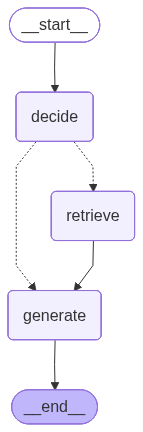

In [53]:
workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("decide", decide_retrieval)
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("generate", generate_answer)

# Set entry point
workflow.set_entry_point("decide")

# Add conditional edges
workflow.add_conditional_edges(
    "decide",
    should_retrieve,
    {
        "retrieve": "retrieve",
        "generate": "generate"
    }
)

# Add edges
workflow.add_edge("retrieve", "generate")
workflow.add_edge("generate", END)

# Compile the graph
app = workflow.compile()
app

In [54]:
def ask_question(question: str):

    initial_state = {
        "question": question,
        "documents": [],
        "answer": "",
        "needs_retrieval": False
    }
    
    result = app.invoke(initial_state)
    return result

In [55]:
question1 = "what is langgraph?"
result1 = ask_question(question1)
result1

{'question': 'what is langgraph?',
 'documents': [Document(id='ab60dcb9-9389-4bf5-807e-39cf603b5a99', metadata={}, page_content='LangGraph is a library for building stateful, multi-actor applications with LLMs. It extends LangChain with the ability to coordinate multiple chains across multiple steps of computation in a cyclic manner.'),
  Document(id='0efe80d8-48ae-4dbe-8201-f248061aafd3', metadata={}, page_content='RAG (Retrieval-Augmented Generation) is a technique that combines information retrieval with text generation. It retrieves relevant documents and uses them to provide context for generating more accurate responses.'),
  Document(id='6a54025f-9c3c-45b1-acdf-ddc2552c5cf3', metadata={}, page_content='Vector databases store high-dimensional vectors and enable efficient similarity search. They are commonly used in RAG systems to find relevant documents based on semantic similarity.'),
  Document(id='a275dee2-f16a-4608-81db-3445eee59a63', metadata={}, page_content='Agentic system

In [56]:
question2 = "How does RAG work?"
result2 = ask_question(question2)

print(f"Question: {question2}")
print(f"Retrieved documents: {len(result2['documents'])}")
print(f"Answer: {result2['answer']}")
print("\n" + "="*50 + "\n")

Question: How does RAG work?
Retrieved documents: 4
Answer: RAG (Retrieval-Augmented Generation) works by combining information retrieval with text generation to produce more accurate and contextually relevant responses. The process typically involves the following steps:

1. **Document Retrieval**: RAG systems use a retrieval mechanism, often powered by a vector database, to find relevant documents based on semantic similarity to the input query. These documents provide external knowledge or context for the generation process.

2. **Context Integration**: The retrieved documents are then used as additional context for the text generation model. This ensures that the model has access to relevant information that may not be part of its pre-trained knowledge.

3. **Text Generation**: Using the input query and the retrieved context, the text generation model (usually a large language model, or LLM) generates a response that is informed by the external knowledge. This improves the accuracy

In [21]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import os
from dotenv import load_dotenv
load_dotenv()
embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001",google_api_key=os.getenv("GOOGLE_API_KEY"))
vector = embeddings.embed_query("hello, world!")

print(f"Embedding vector length: {len(vector)}")

Embedding vector length: 3072


In [22]:
vectors = embeddings.embed_documents(
    [
        "Today is Monday",
        "Today is Tuesday",
        "Today is April Fools day",
    ]
)
len(vectors), len(vectors[0])

(3, 3072)

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    api_key=os.getenv("GROQ_API_KEY"),
    model="openai/gpt-oss-120b",
    temperature=0.7,
    max_retries=3,
    streaming=True,
    reasoning_format="parsed"
)

messages = [
    (
        "system",
        "You are a helpful assistant",
    ),
    ("human", "python code to create a vector store"),
]
ai_msg = llm.invoke(messages)
ai_msg.content


('content', 'Below is a **complete, runnable example** that shows how to:\n\n1. **Load some text data** (you can replace this with your own documents).  \n2. **Create embeddings** for each chunk of text using OpenAI’s `text‑embedding‑ada‑002` model (you can swap in any other embedding provider).  \n3. **Store the embeddings in a vector store** (FAISS is used here because it runs locally and needs no external service).  \n4. **Query the store** to retrieve the most similar chunks.\n\nYou can adapt the same pattern to other vector‑store back‑ends such as **Chroma**, **Pinecone**, **Weaviate**, **Milvus**, etc. The only thing that changes is the import/initialisation of the store class.\n\n---\n\n## 1️⃣ Install the required packages\n\n```bash\npip install openai faiss-cpu tiktoken tqdm\n# If you prefer LangChain helpers (optional but convenient):\npip install langchain\n```\n\n> **Note**  \n> - `faiss-cpu` works on most CPUs. If you have a GPU you can install `faiss-gpu` instead.  \n> - 

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, SystemMessage
import os
llm = ChatGroq(
    api_key=os.getenv("GROQ_API_KEY"),
    model="openai/gpt-oss-120b",
    temperature=0.7,
    max_retries=3,
    streaming=True,
    reasoning_format="parsed"
)

messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Python code to create a vector store."),
]
print("=== Streaming Response ===")
for chunk in llm.stream(messages):
    # `chunk` is a `ChatCompletionChunk`
    # The new text is in `chunk.delta`
    print(chunk.text, end="")
print("\n=== End ===")

=== Streaming Response ===
Below is a **complete, runnable example** that shows how to

1. **Generate embeddings** for a list of texts (using OpenAI’s embeddings API or a local Sentence‑Transformers model).  
2. **Create a vector store** (FAISS – a fast, in‑memory, open‑source similarity search library).  
3. **Persist the index** to disk and later **load it back**.  
4. **Perform a similarity search** (k‑nearest‑neighbors) and retrieve the original documents.

You can swap the embedding model or the vector‑store backend (e.g., Chroma, Milvus, Pinecone) with only a few lines of change – the pattern stays the same.

---

## 1️⃣ Install the required packages

```bash
# Core packages
pip install faiss-cpu           # or `pip install faiss-gpu` if you have a CUDA GPU
pip install tqdm                # progress bars (optional but nice)

# Choose ONE of the two embedding options below:
# ────────────────────────────────────────────────────────
# Option A – OpenAI (cloud) embeddings
pip instal

## LangGraph Basics

#### Simple Graph


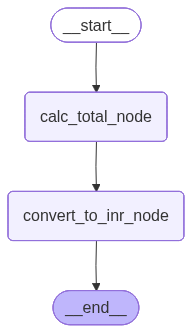

In [1]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

def calc_total(state: PortfolioState)-> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState)-> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node",convert_to_inr)

builder.add_edge(START,"calc_total_node")
builder.add_edge("calc_total_node","convert_to_inr_node")
builder.add_edge("convert_to_inr_node",END)

graph = builder.compile()
graph

In [2]:
graph.invoke({"amount_usd": 10000})

{'amount_usd': 10000, 'total_usd': 10800.0, 'total_inr': 918000.0}

#### Conditional Graph

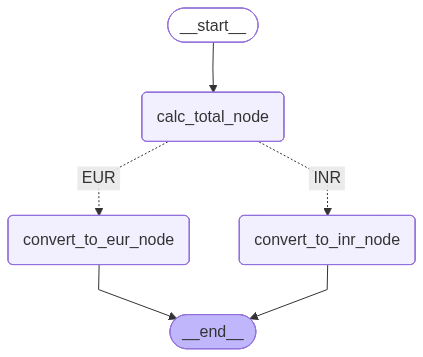

In [7]:
from typing import TypedDict, Literal
from langgraph.graph import START, END, StateGraph

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["INR","EUR"]
    total: float

def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 85
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.9
    return state

def choose_conversion(state: PortfolioState) -> str:
    return state['target_currency']

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node",convert_to_inr)
builder.add_node("convert_to_eur_node",convert_to_eur)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node"
    }
)
builder.add_edge(["convert_to_inr_node", "convert_to_eur_node"],END)

graph = builder.compile()
graph

In [8]:
print(graph.invoke({"amount_usd": 1000, "target_currency": "EUR"}))
print(graph.invoke({"amount_usd": 1000, "target_currency": "INR"}))

{'amount_usd': 1000, 'total_usd': 1080.0, 'target_currency': 'EUR', 'total': 972.0}
{'amount_usd': 1000, 'total_usd': 1080.0, 'target_currency': 'INR', 'total': 91800.0}


#### Chatbot in LangGraph

c:\Users\maquib\projects\rag\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


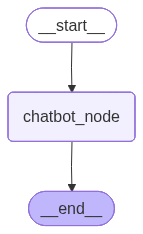

In [1]:
from typing import TypedDict,Annotated
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages
load_dotenv(override=True )


llm = init_chat_model(
    "openai/gpt-oss-120b",
    model_provider="groq",
    temperature=0.7,
)

class State(TypedDict):
    messages: Annotated[list,add_messages]


def chatbot(state: State) -> State:
    return {"messages": [llm.invoke(state["messages"])]}

builder = StateGraph(State)

builder.add_node("chatbot_node", chatbot)

builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)

graph = builder.compile()
graph

In [2]:
message = {"role": "user","content":"what is machine learning?"}
response = graph.invoke({"messages": [message]})
print(response["messages"])

[HumanMessage(content='what is machine learning?', additional_kwargs={}, response_metadata={}, id='c47208e6-c89b-4d89-bedc-474b40f7f5ba'), AIMessage(content='**Machine learning (ML)** is a subfield of artificial intelligence (AI) that focuses on building systems that can learn from data, identify patterns, and make decisions or predictions without being explicitly programmed for every possible scenario.\n\n### Core Idea\n- **Learning from data:** Instead of writing detailed rules, you feed a computer algorithm a large set of examples (the *training data*). The algorithm discovers the underlying relationships and creates a model.\n- **Generalization:** The model can then apply what it learned to new, unseen data (the *test* or *real‑world* data).\n\n### How It Works (Simplified)\n1. **Collect Data:** Gather relevant examples (e.g., images, text, sensor readings).\n2. **Choose a Model:** Select an algorithm (e.g., linear regression, decision tree, neural network) that can represent the r

In [ ]:
### Run this as a .py file then only it will work

from typing import TypedDict,Annotated
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages
load_dotenv(override=True )


llm = init_chat_model(
    "openai/gpt-oss-120b",
    model_provider="groq",
    temperature=0.7,
)

print("Hello")

class State(TypedDict):
    messages: Annotated[list,add_messages]


def chatbot(state: State) -> State:
    return {"messages": [llm.invoke(state["messages"])]}

builder = StateGraph(State)

builder.add_node("chatbot_node", chatbot)

builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)

graph = builder.compile()

state = None
while True:
    in_message = input("You:  ")
    if in_message.lower() in {"quit","exit"}:
        break
    if state is None:
        state: State = {
            "messages": [
                {
                "role": "user",
                "content": in_message
                }
                ]
            }
    else:
        state["messages"].append(
            {
                "role": "user",
                "content": in_message
            }
        )
    
    state = graph.invoke(state)
    print("Bot:", state["messages"][-1].content)

#### Chatbot with tool

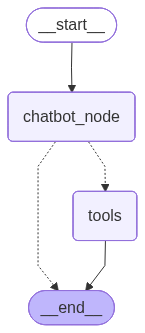

In [19]:
from typing import Annotated, TypedDict
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv
load_dotenv(override=True)

class State(TypedDict):
    messages: Annotated[list, add_messages]

llm = init_chat_model(
    "openai/gpt-oss-120b",
    model_provider="groq",
    temperature=0.7,
)

@tool
def get_stock_price(symbol:str)->float:
    """
    Return the current price of a stock given the stock symbol
    :param symbol: stock symbol
    :return: current price of the stock
    """
    return {
        "MSFT": 200.3,
        "AAPL": 100.4,
        "AMZN": 150.0,
        "RIL": 87.6
    }.get(symbol,0.0)

tools = [get_stock_price]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)

builder.add_node("chatbot_node",chatbot)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"chatbot_node")
builder.add_conditional_edges("chatbot_node", tools_condition)

graph = builder.compile()

graph

In [20]:
state = graph.invoke(
    {
        "messages": [{"role":"user","content":"what is the price of AAPL stock right now"}]
    }
)
print(state["messages"][-1].content)

100.4


In [21]:
state = graph.invoke(
    {
        "messages": [{"role":"user","content":"what is the MOE in LLM"}]
    }
)
print(state["messages"][-1].content)

**MOE = Mixture‑of‑Experts (in the context of large language models)**  

A *Mixture‑of‑Experts* (MoE) architecture is a way to scale neural networks—especially transformer‑based language models—by adding a large collection of **expert** sub‑networks and letting a **gating** mechanism decide which experts to use for each input token (or for each forward pass). The key idea is **conditional computation**: instead of activating the entire model for every token, only a small subset of experts (often 1–4 out of dozens or hundreds) are activated, which keeps the per‑token compute roughly constant while the total model capacity can be orders of magnitude larger.

---

## 1. How an MoE layer works

| Component | Role |
|-----------|------|
| **Experts** | Independent feed‑forward (or sometimes full transformer) sub‑networks, each with its own parameters. |
| **Gating network** | Usually a lightweight linear layer followed by a softmax (or top‑k softmax). It takes the token representation as i

In [22]:
msg = "I want to buy 20 AMZN stocks using current price. Then 15 MSFT. What will be the total cost?"

state = graph.invoke({"messages": [{"role": "user", "content": msg}]})
print(state["messages"][-1].content)

150.0


##### using only langchain for tool caling

```python

from langchain.chat_models import init_chat_model
from langchain_core.tools import tool
from langchain_core.messages import ToolMessage

@tool
def get_stock_price(symbol: str) -> float:
    """Return the current price of a stock given the stock symbol."""
    return {
        "MSFT": 200.3,
        "AAPL": 100.4,
        "AMZN": 150.0,
        "RIL": 87.6
    }.get(symbol, 0.0)

# Initialize LLM
llm = init_chat_model(
    "openai/gpt-oss-120b",
    model_provider="groq",
    temperature=0.7,
)

# Bind tools
tools = [get_stock_price]
llm_with_tools = llm.bind_tools(tools)

# Initial user message
messages = [
    {"role": "user", "content": "What is the price of AAPL stock right now?"}
]

# Step 1: Ask the model
ai_message = llm_with_tools.invoke(messages)

# Step 2: Check if tool was called
if ai_message.tool_calls:
    call = ai_message.tool_calls[0]
    tool_name = call["name"]
    args = call["args"]
    tool_call_id = call["id"]  # ⚠️ must include this id

    # Step 3: Execute the tool properly
    result = get_stock_price.invoke(args)

    # Step 4: Create a ToolMessage (not a dict!)
    tool_msg = ToolMessage(
        tool_call_id=tool_call_id,
        name=tool_name,
        content=str(result)
    )

    # Step 5: Send back both messages
    new_messages = [*messages, ai_message, tool_msg]
    final_response = llm_with_tools.invoke(new_messages)
    print(final_response.content)
else:
    print(ai_message.content)
```

#### Tool Call Agent

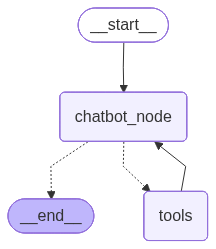

In [ ]:
from typing import Annotated, TypedDict
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv
load_dotenv(override=True)

class State(TypedDict):
    messages: Annotated[list, add_messages]

llm = init_chat_model(
    "openai/gpt-oss-120b",
    model_provider="groq",
    temperature=0.7,
)

@tool
def get_stock_price(symbol:str)->float:
    """
    Return the current price of a stock given the stock symbol
    :param symbol: stock symbol
    :return: current price of the stock
    """
    return {
        "MSFT": 200.3,
        "AAPL": 100.4,
        "AMZN": 150.0,
        "RIL": 87.6
    }.get(symbol,0.0)

tools = [get_stock_price]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)

builder.add_node("chatbot_node",chatbot)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"chatbot_node")
builder.add_conditional_edges("chatbot_node", tools_condition)
builder.add_edge("tools","chatbot_node") # tools output going back to chatbot

graph = builder.compile()

graph

In [31]:
msg = "I want to buy 20 AMZN stocks using current price. Then 15 MSFT. What will be the total cost?"

state = graph.invoke({"messages": [{"role": "user", "content": msg}]})
print(state["messages"][-1].content)

The current prices are:

- **AMZN:** \$150.00 per share  
- **MSFT:** \$200.30 per share  

Calculating the cost:

- 20 AMZN × \$150.00 = **\$3,000.00**  
- 15 MSFT × \$200.30 = **\$3,004.50**

**Total cost:** **\$6,004.50**.


#### Memory

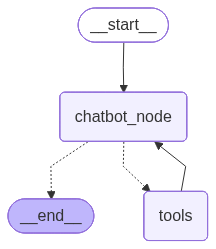

In [32]:
from typing import TypedDict, Annotated
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv

load_dotenv()
memory = MemorySaver()

class State(TypedDict):
    messages: Annotated[list, add_messages]


@tool
def get_stock_price(symbol:str)->float:
    """
    Return the current price of a stock given the stock symbol
    :param symbol: stock symbol
    :return: current price of the stock
    """
    return {
        "MSFT": 200.3,
        "AAPL": 100.4,
        "AMZN": 150.0,
        "RIL": 87.6
    }.get(symbol,0.0)

tools = [get_stock_price]
llm = init_chat_model(
    "openai/gpt-oss-120b",
    model_provider="groq",
    temperature=0.7,
)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)

builder.add_node("chatbot_node",chatbot)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"chatbot_node")
builder.add_conditional_edges("chatbot_node",tools_condition)
builder.add_edge("tools","chatbot_node")

graph = builder.compile(checkpointer=memory)

graph

In [33]:
config_1 = {"configurable": {"thread_id": 1}}
msg = "I want to buy 20 AMZN stocks using current price. Then 15 MSFT. what will be the total cost?"
state = graph.invoke({"messages":[{"role":"user","content":msg}]},config=config_1)
print(state["messages"][-1].content)

The current prices are:

- **AMZN:** $150.00 per share  
- **MSFT:** $200.30 per share  

Calculating the cost:

- 20 × $150.00 = **$3,000.00**  
- 15 × $200.30 = **$3,004.50**  

**Total cost:** **$6,004.50**.


In [34]:
config_2 = { 'configurable': { 'thread_id': '2'} }
msg = "Tell me the current price of 5 AAPL stocks."
state = graph.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": msg
            }
        ]
    }, config=config_2
)
print(state["messages"][-1].content)

The current price for Apple (AAPL) is **$100.40 per share**.  

For **5 shares**, the total would be:

\(5 \times \$100.40 = \$502.00\)

So, 5 AAPL stocks would cost **$502.00** at the current price.


In [35]:
msg = "Using the current price tell me the total price of 10 RIL stocks and add it to previous total cost"
state = graph.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": msg
            }
        ]
    }, config=config_1
)
print(state["messages"][-1].content)

- **RIL:** $87.60 per share  
- 10 × $87.60 = **$876.00**

Adding this to the earlier total of **$6,004.50** gives:

**$6,004.50 + $876.00 = $6,880.50**

**New combined total cost: $6,880.50**.


In [36]:
msg = "Tell me the current price of 5 MSFT stocks and add it to previous total"
state = graph.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": msg
            }
        ]
    }, config=config_2
)
print(state["messages"][-1].content)

The current price for Microsoft (MSFT) is **$200.30 per share**.

**Cost for 5 MSFT shares:**  
\(5 \times \$200.30 = \$1{,}001.50\)

**Combined total with the previous 5 AAPL shares:**  

- AAPL (5 shares) = $502.00  
- MSFT (5 shares) = $1,001.50  

**Grand total:** **$1,503.50**.


#### Human in the Loop

In [3]:
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import interrupt, Command
from langchain_core.tools import tool

load_dotenv()

class state(TypedDict):
    messages: Annotated[list, add_messages]

@tool
def get_stock_price(symbol: str)-> float:
    '''Return the current price of a stock given the stock symbol'''
    return {"MSFT": 200.3, "AAPL": 100.4, "AMZN": 150.0, "RIL": 87.6}.get(symbol, 0.0)

@tool
def buy_stock(symbol:str,quantity:int,total_price:float)-> str:
    '''Buy stocks given the stock symbol and quantity'''
    decision = interrupt(f"Approve buying {quantity} {symbol} stocks for ${total_price:.2f}?")
    if decision == "yes":
        return f"You bought {quantity} shares of {symbol} for a total price of {total_price}"
    else:
        return "Buying Declined !!!"

tools = [get_stock_price,buy_stock]

llm = init_chat_model(
    "openai/gpt-oss-120b",
    model_provider="groq",
    temperature=0.7,
)
llm_with_tools = llm.bind_tools(tools)


def chatbot(state:state):
    msg = llm_with_tools.invoke(state["messages"])
    return {"messages": [msg]}

memory = MemorySaver()

builder = StateGraph(state)
builder.add_node("chatbot_node",chatbot)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"chatbot_node")
builder.add_conditional_edges("chatbot_node",tools_condition)
builder.add_edge("tools","chatbot_node")
builder.add_edge("chatbot_node",END)

graph = builder.compile(memory)

config = {"configurable": {"thread_id": "buy_thread"}}
state = graph.invoke({"messages":[{"role":"user","content":"What is the current price of 10 MSFT stocks?"}]}, config=config)
print(state["messages"][-1].content)

state = graph.invoke({"messages":[{"role":"user","content":"Buy 10 MSFT stocks at current price."}]}, config=config)
print(state.get("__interrupt__"))

decision = input("Approve (yes/no): ")
state = graph.invoke(Command(resume=decision),config = config)
print(state["messages"][-1].content)



The current price for Microsoft (MSFT) is **$200.30 per share**.  

For **10 shares**, the total cost would be:

**10 × $200.30 = $2,003.00**.
[Interrupt(value='Approve buying 10 MSFT stocks for $2003.00?', id='42131441a7d9476b31f7dbe78df54dea')]
Your purchase was successful! 🎉

- **Stock:** Microsoft (MSFT)  
- **Quantity:** 10 shares  
- **Total Cost:** $2,003.00  

Let me know if you’d like to check your portfolio, view the latest price, or make any other trades.
